<title>Проблема качества данных на примере Titanic-Dataset</title>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score

# Получение и загрузка данных

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Удаление пропущенных значений и категориальных переменных. Обучение модели1. Выбор и подсчет метрики качества.

Удалим столбцы с категориальными переменными

In [6]:
dataset1 = df.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


Пропущенные значения остались в стобце `Age`, удалим их

In [8]:
dataset1 = dataset1[~dataset1['Age'].isna()]

Разделим выборку на train, test части

In [9]:
X = dataset1.drop(columns='Survived')
Y = dataset1['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy1 = model.score(X_test, Y_test)
precision1 = precision_score(Y_test, predictions)
recall1 = recall_score(Y_test, predictions)
print(f'{accuracy1=}, {precision1=}, {recall1=}')

accuracy1=0.7202797202797203, precision1=0.875, recall1=0.3620689655172414


# Подгрузка данных снова, проставление пропущенных значений

In [11]:
df = pd.read_csv('train.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Пропущено 891-714=177 (20%) в колонке `Age`. Предположительно, возраст - сильный признак, который влияет на таргет.
Попробуем его заполнить

## Заполнение отсутствующих значений

Создадим индикатор отсутствия значения в колонке возраст

In [13]:
df['empty_age'] = df['Age'].isna().astype(int)

Определим статус каждого пассажира из колонки `Name`

In [14]:
df['status'] = df['Name'].str.replace('.', ',', regex=False).str.split(',', n=2, expand=True)[1]

Определившееся статусы пассажиров:

In [15]:
df['status'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: status, dtype: int64

Определим средний возраст для каждого статуса пассажира на основе записей, у которых `Age` заполнен

In [16]:
avg_age_for_status = df[~df.status.isna()][['status','Age']].groupby('status').mean().reset_index()
avg_age_for_status.head()

,status,Age
0,Capt,70.0
1,Col,58.0
2,Don,40.0
3,Dr,42.0
4,Jonkheer,38.0


Добавим средний возраст для статуса

In [17]:
df = df.merge(avg_age_for_status, on='status', suffixes=('', '_avg'))

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,empty_age,status,Age_avg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,32.36809
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,32.36809
2,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Mr,32.36809
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,Mr,32.36809
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,Mr,32.36809


Проставим средний возраст согласно статусу, для записей с пустым `Age`

In [19]:
df.loc[df.Age.isna(), 'Age'] = df.loc[df.Age.isna(), 'Age_avg']

# Удаление ненужных признаков

Логически нам не понадобятся признаки:
* `PassengerId` - порядковыый номер пассажира, выдаваться может хоатично, например по мере покупки/бронирования билетов
* `Name` - имя человека не влияет
* `Ticket` - аналогично с `PassengerId` может выдаваться хоатично
* `Cabin` - может влиять, но для этого потребуется слишком тонкий анализ расположения номера кабины на уровнях палубы и прочее. В нашем случае будем считать, что это поле влияния не оказывает
* `Embarked` - может влиять, по аналогии с `Cabin`, но в нашем случае будем считать, что это поле влияния не оказывает
* `Age_avg` - технический столбец, можно удалить
* `status` - технический столбец, можно удалить

In [20]:
dataset2 = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Age_avg', 'status'])

# Проверка данных на пропущенные значения

In [21]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   empty_age  891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 59.2+ KB


Нужные поля выбраны, пустые значения заполнены

# Перевод категориальных переменных в цифровые значения. 

In [22]:
df_with_selected_columns = dataset2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'empty_age', 'Survived']]
X = pd.get_dummies(df_with_selected_columns, columns=['Pclass', 'Sex'])

# Проверка данных на наличие выбросов

## Рассмотрим распределение значений `Age`

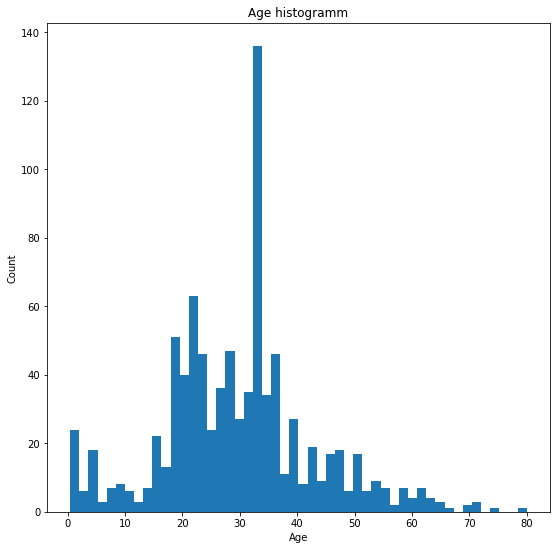

In [23]:
plt.figure(figsize=(9, 9))
plt.hist(X.Age, bins=50)
plt.title('Age histogramm')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

В целом, возраст распределен нормально

## Рассмотрим распределение `Fare`

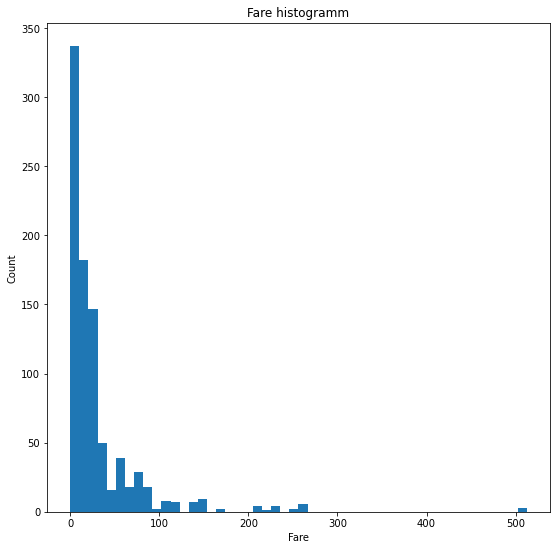

In [24]:
plt.figure(figsize=(9, 9))
plt.hist(X.Fare, bins=50)
plt.title('Fare histogramm')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

Построим Boxplot на колонке `Fare`

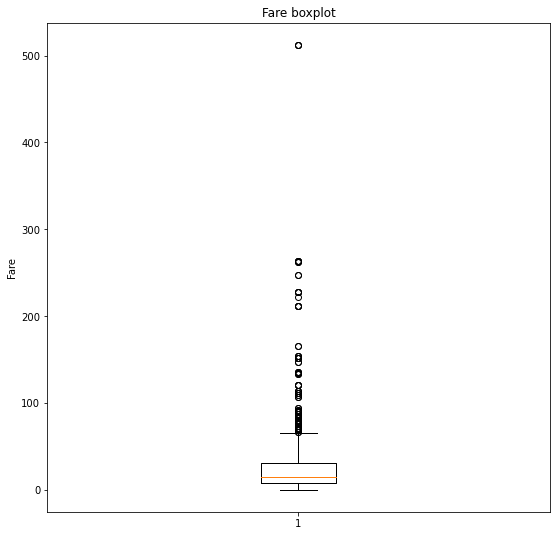

In [26]:
plt.figure(figsize=(9, 9))
plt.boxplot(X.Fare)
plt.title('Fare boxplot')
plt.ylabel('Fare')
plt.show()

Удалим выбросы, у которых `Fare` > 200, таких будет менее 2.2% - на итог не должны влиять

In [27]:
100 * len(X[X['Fare'] > 200]) / len(X)

2.244668911335578

In [28]:
X = X[X['Fare'] <= 200]

## Построим модель2

In [29]:
Y = X['Survived']
X = X.drop(columns='Survived')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy2 = model.score(X_test, Y_test)
precision2 = precision_score(Y_test, predictions)
recall2 = recall_score(Y_test, predictions)

## Сравним модели1  и модели2

In [31]:
print(f'{accuracy1=}, {precision1=}, {recall1=}')
print(f'{accuracy2=}, {precision2=}, {recall2=}')

accuracy1=0.7202797202797203, precision1=0.875, recall1=0.3620689655172414
accuracy2=0.8514285714285714, precision2=0.8688524590163934, recall2=0.7464788732394366


Видно, что у модели2 результаты выше, чем у модели1

# Выводы

Итого:
* Построены 2 модели
* Для первой модели удалены категориальные признаки, для второй - некоторые категориальные признаки оставлены и предопработаны
* Для модели2 было дозаполнено поле `Age` там, где отсутствовали значения
* Для модели2 были удалены выборосы по `Fare`
* В сравенении модель2 показала лучшие результаты, чем модель1
* Целесообразность работы с данными при построении моделей машинного обучения: как и в данной работе, аналогичным образом имеет смысл исследовать и дополнять большие данные